In [1]:
import sksurv
import os
import pandas as pd

In [3]:
os.chdir('U:\\ProjectDataset')

In [4]:
dt=pd.read_excel('gene + clinical LUAD.xlsx')


In [5]:
dt=dt.set_index(dt.columns[0])

In [46]:
c=pd.read_excel('cox Luad.xlsx')

In [64]:
result=c.to_records(index=False)

In [65]:
c['Patient\'s Vital Status' ]=c['Patient\'s Vital Status' ].astype('bool')

In [66]:
print(c.columns)

Index(['Patient's Vital Status', 'Survival '], dtype='object')


In [67]:
result

rec.array([( True, 0.0000e+00), ( True, 5.0030e+01), (False, 3.9800e+00),
           (False, 1.9940e+01), ( True, 1.3990e+01), ( True, 4.4970e+01),
           ( True, 3.6990e+01), (False, 0.0000e+00), (False, 9.9500e+00),
           (False, 2.4010e+01), ( True, 4.7010e+01), (False, 8.0200e+00),
           ( True, 1.8990e+01), ( True, 2.0040e+01), ( True, 0.0000e+00),
           (False, 2.9900e+00), ( True, 1.4950e+01), (False, 9.0000e+00),
           ( True, 2.9960e+01), ( True, 1.1990e+01), ( True, 2.9990e+01),
           ( True, 2.1980e+01), ( True, 2.5990e+01), ( True, 2.5990e+01),
           ( True, 2.5000e+01), ( True, 2.5000e+01), ( True, 2.3980e+01),
           (False, 1.5010e+01), ( True, 1.5010e+01), ( True, 4.9600e+00),
           ( True, 2.8980e+01), ( True, 2.2010e+01), (False, 9.0300e+00),
           ( True, 2.0400e+00), ( True, 4.6000e-01), ( True, 7.3900e+00),
           ( True, 5.9800e+00), ( True, 8.6700e+00), ( True, 9.7670e+01),
           ( True, 1.2070e+02), (False

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dt,result,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(361, 261) (361,)
(156, 261) (156,)


In [30]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(dt, result)


iter     10: optimization converged


CoxPHSurvivalAnalysis(alpha=1, n_iter=100, tol=1e-09, verbose=1)

In [31]:
pd.Series(estimator.coef_, index=dt.columns)

ABCD2                                                             -0.233446
ABLIM1                                                             0.247545
ABRA                                                               0.471735
ACD                                                               -0.458201
ACOT13                                                            -0.396368
ACOT8                                                             -0.220161
ACSM5                                                              0.200671
ADAMDEC1                                                           0.443884
ADRA1D                                                             0.165225
AGBL4                                                             -0.017411
AKAP11                                                             0.076498
ALDH8A1                                                           -0.190942
ALKBH4                                                            -0.354049
ANGPTL1     

In [32]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(dt)
result = concordance_index_censored(c['Patient\'s Vital Status'], c['Survival '], prediction)
result[0]

0.9581727987789116

Text(0.5,0,'time $t$')

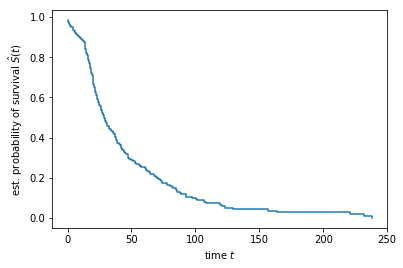

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(c['Patient\'s Vital Status'], c['Survival '])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [34]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_train, Y_train)

iter     12: optimization converged


CoxPHSurvivalAnalysis(alpha=1, n_iter=100, tol=1e-09, verbose=1)

In [35]:
pd.Series(estimator.coef_, index=dt.columns)

ABCD2                                                             -0.728545
ABLIM1                                                             0.534244
ABRA                                                               0.345319
ACD                                                               -0.308508
ACOT13                                                            -0.440736
ACOT8                                                              0.429152
ACSM5                                                              0.039532
ADAMDEC1                                                           0.664527
ADRA1D                                                             0.310180
AGBL4                                                             -1.134468
AKAP11                                                            -0.341716
ALDH8A1                                                           -0.045784
ALKBH4                                                            -0.305531
ANGPTL1     

In [38]:
from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(X_train)
result = concordance_index_censored(Y_train['Patient\'s Vital Status'], Y_train['Survival '], prediction)
result[0]

0.9894266680125164

In [41]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(estimator,X_train,Y_train,cv=5))

iter     15: optimization converged
iter     14: optimization converged
iter     18: optimization converged
iter     18: optimization converged
iter     15: optimization converged
[0.73935264 0.81272596 0.78696439 0.75917278 0.8366305 ]


In [42]:
from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(X_test)
result = concordance_index_censored(Y_test['Patient\'s Vital Status'], Y_test['Survival '], prediction)
result[0]

0.8044928522804629

In [44]:
dt1=pd.read_excel('selected genes LUAD 2k.xlsx')
dt1=dt1.set_index(dt1.columns[0])

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dt1,result,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_train, Y_train)
from sksurv.metrics import concordance_index_censored
print('train score')
prediction = estimator.predict(X_train)
result = concordance_index_censored(Y_train['Patient\'s Vital Status'], Y_train['Survival '], prediction) 
result[0]

(361, 2864) (361,)
(156, 2864) (156,)
iter     19: optimization converged
train score


1.0

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(estimator,X_train,Y_train,cv=5))
# 0.69330734,0.76082172,0.76878276,0.7234369,0.75122549; avg: 0.7395202

In [59]:
#0.69...
print('test')
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_test, Y_test)
from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(X_test)
result = concordance_index_censored(Y_test['Patient\'s Vital Status'], Y_test['Survival '], prediction)
result[0]

test
iter     24: optimization converged


1.0

In [72]:
print('test')
from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(X_test)
result = concordance_index_censored(Y_test['Patient\'s Vital Status'], Y_test['Survival '], prediction)
result[0]

test


0.7196040156162855

In [71]:
from pandas import Series
import numpy as np
c=np.array(estimator.coef_)
#predictors=X_train.columns
pd.Series(estimator.coef_,index=X_train.columns).sort_values(ascending=False)

Patient's Vital Status     1.105462
Overall Survival Status    1.105458
C16ORF78                   1.028923
ARHGAP36                   0.961768
TRAPPC3L                   0.862291
EQTN                       0.838786
C11ORF94                   0.830570
ANGPTL7                    0.806832
AANAT                      0.744514
C18ORF21                   0.742221
C22ORF29                   0.724470
ADAM20                     0.718324
BHLHE40                    0.685913
SCP2D1                     0.678354
SDR16C6P                   0.665428
AKAP4                      0.649085
AK5                        0.646765
ANKLE2                     0.640528
AEN                        0.639621
B3GNT8                     0.631153
ARMCX3                     0.627802
IBA57                      0.625322
AGAP7P                     0.598453
TAMM41                     0.584303
C16ORF92                   0.578702
C5ORF38                    0.569364
C6ORF203                   0.563831
ACBD3                      0